In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r"C:\Users\gudek\Downloads\Housing.csv")  # Make sure the file is in your working directory

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (545, 13)

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeI

In [2]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Handle missing values (simple approach - fill with median)
df = df.fillna(df.median())

# Visualize relationships
plt.figure(figsize=(12, 8))

# Plot 1: Price vs Square Feet
plt.subplot(2, 2, 1)
plt.scatter(df['sqft_living'], df['price'], alpha=0.5)
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Price vs Square Feet')

# Plot 2: Price vs Bedrooms
plt.subplot(2, 2, 2)
plt.scatter(df['bedrooms'], df['price'], alpha=0.5)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price vs Bedrooms')

# Plot 3: Correlation heatmap
plt.subplot(2, 2, 3)
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


TypeError: Cannot convert [['yes' 'yes' 'yes' ... 'yes' 'no' 'yes']
 ['no' 'no' 'no' ... 'no' 'no' 'no']
 ['no' 'no' 'yes' ... 'no' 'no' 'no']
 ...
 ['yes' 'yes' 'no' ... 'no' 'no' 'no']
 ['yes' 'no' 'yes' ... 'no' 'no' 'no']
 ['furnished' 'furnished' 'semi-furnished' ... 'unfurnished' 'furnished'
  'unfurnished']] to numeric

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv(r"C:\Users\gudek\Downloads\Housing.csv")  # Using the correct dataset name

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nColumn names and data types:")
print(df.dtypes)

Dataset Shape: (545, 13)

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeI

Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Numerical columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
Encoded mainroad: {'no': np.int64(0), 'yes': np.int64(1)}
Encoded guestroom: {'no': np.int64(0), 'yes': np.int64(1)}
Encoded basement: {'no': np.int64(0), 'yes': np.int64(1)}
Encoded hotwaterheating: {'no': np.int64(0), 'yes': np.int64(1)}
Encoded airconditioning: {'no': np.int64(0), 'yes': np.int64(1)}
Encoded prefarea: {'no': np.int64(0), 'yes': np.int64(1)}
Encoded furnishingstatus: {'furnished': np.int64(0), 'semi-furnished': np.int64(1), 'unfurnished': np.int64(

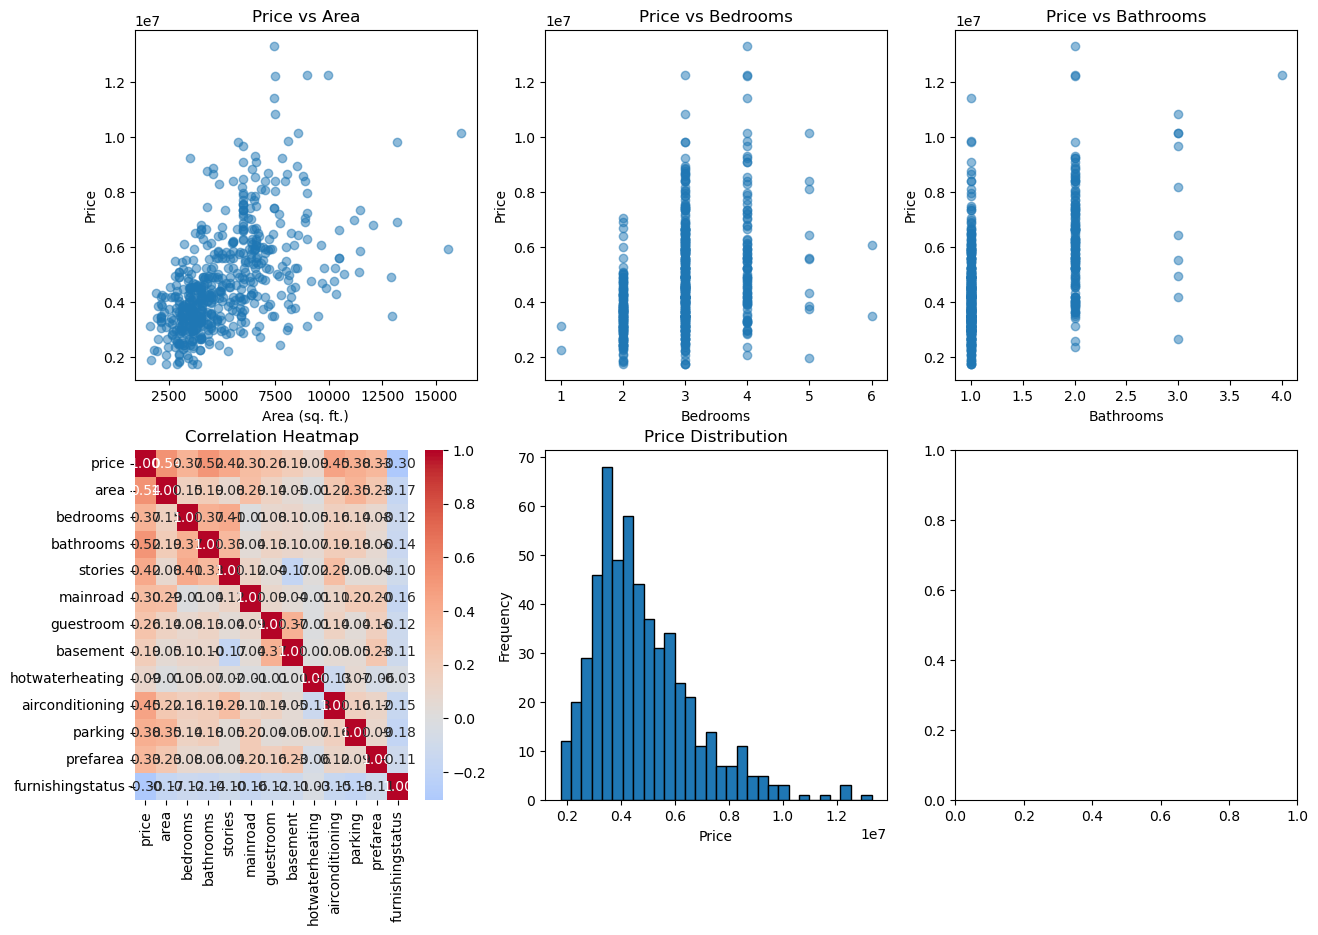

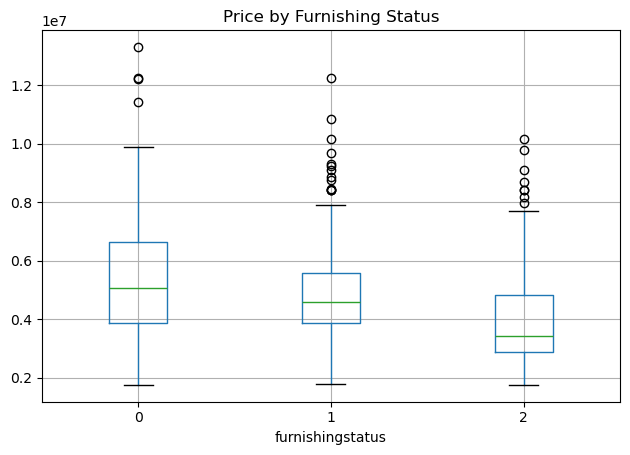

In [5]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Handle missing values - only for numerical columns
if df[numerical_cols].isnull().sum().any():
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    print("Filled missing numerical values with median")

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Visualize relationships
plt.figure(figsize=(15, 10))

# Plot 1: Price vs Area
plt.subplot(2, 3, 1)
plt.scatter(df['area'], df['price'], alpha=0.5)
plt.xlabel('Area (sq. ft.)')
plt.ylabel('Price')
plt.title('Price vs Area')

# Plot 2: Price vs Bedrooms
plt.subplot(2, 3, 2)
plt.scatter(df['bedrooms'], df['price'], alpha=0.5)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price vs Bedrooms')

# Plot 3: Price vs Bathrooms
plt.subplot(2, 3, 3)
plt.scatter(df['bathrooms'], df['price'], alpha=0.5)
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price vs Bathrooms')

# Plot 4: Correlation heatmap
plt.subplot(2, 3, 4)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')

# Plot 5: Distribution of price
plt.subplot(2, 3, 5)
plt.hist(df['price'], bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')

# Plot 6: Boxplot of price by furnishing status
plt.subplot(2, 3, 6)
df.boxplot(column='price', by='furnishingstatus')
plt.title('Price by Furnishing Status')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()

SIMPLE LINEAR REGRESSION RESULTS:
Coefficient: 425.73
Intercept: 2512254.26
MAE: 1474748.13
MSE: 3675286604768.19
RMSE: 1917103.70
R² Score: 0.2729


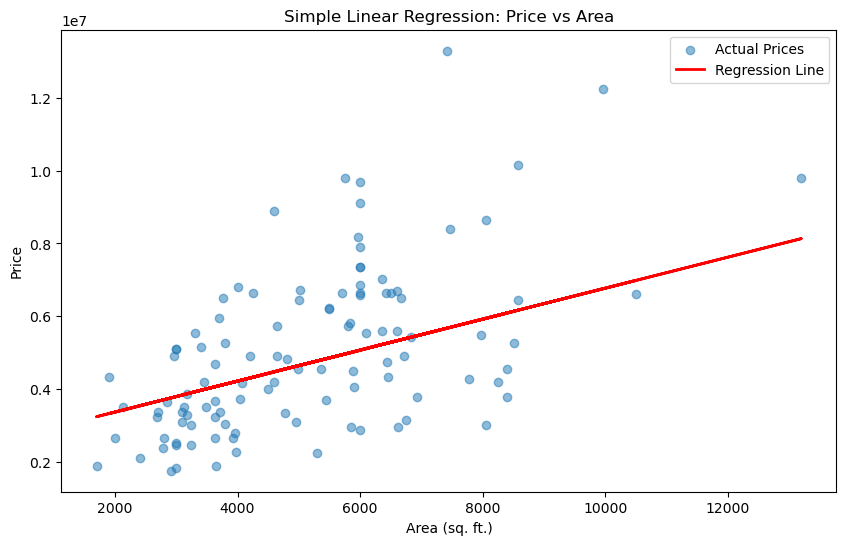


INTERPRETATION:
For every additional square foot of area, the price increases by $425.73


In [6]:
# Simple Linear Regression: Price vs Area
X_simple = df[['area']]
y_simple = df['price']

# Split the data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

# Create and fit the model
simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)

# Make predictions
y_pred_s = simple_model.predict(X_test_s)

# Evaluate the model
mae_s = mean_absolute_error(y_test_s, y_pred_s)
mse_s = mean_squared_error(y_test_s, y_pred_s)
r2_s = r2_score(y_test_s, y_pred_s)

print("SIMPLE LINEAR REGRESSION RESULTS:")
print(f"Coefficient: {simple_model.coef_[0]:.2f}")
print(f"Intercept: {simple_model.intercept_:.2f}")
print(f"MAE: {mae_s:.2f}")
print(f"MSE: {mse_s:.2f}")
print(f"RMSE: {np.sqrt(mse_s):.2f}")
print(f"R² Score: {r2_s:.4f}")

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test_s, y_test_s, alpha=0.5, label='Actual Prices')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area (sq. ft.)')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Price vs Area')
plt.legend()
plt.show()

# Interpretation
print(f"\nINTERPRETATION:")
print(f"For every additional square foot of area, the price increases by ${simple_model.coef_[0]:.2f}")

In [7]:
# Select features for multiple regression (excluding price as it's our target)
feature_columns = [col for col in df.columns if col != 'price']
X_multi = df[feature_columns]
y_multi = df['price']

print(f"Features used: {feature_columns}")

# Split the data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_m)
X_test_scaled = scaler.transform(X_test_m)

# Create and fit the multiple regression model
multi_model = LinearRegression()
multi_model.fit(X_train_scaled, y_train_m)

# Make predictions
y_pred_m = multi_model.predict(X_test_scaled)

# Evaluate the model
mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)

print("\nMULTIPLE LINEAR REGRESSION RESULTS:")
print("Coefficients:")
for feature, coef in zip(feature_columns, multi_model.coef_):
    print(f"  {feature:15}: {coef:10.2f}")
print(f"Intercept: {multi_model.intercept_:.2f}")
print(f"MAE: {mae_m:.2f}")
print(f"MSE: {mse_m:.2f}")
print(f"RMSE: {np.sqrt(mse_m):.2f}")
print(f"R² Score: {r2_m:.4f}")

Features used: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

MULTIPLE LINEAR REGRESSION RESULTS:
Coefficients:
  area           :  519288.13
  bedrooms       :   58690.92
  bathrooms      :  523153.38
  stories        :  348177.11
  mainroad       :  128115.93
  guestroom      :   89357.65
  basement       :  188462.05
  hotwaterheating:  150570.03
  airconditioning:  362446.19
  parking        :  192786.99
  prefarea       :  266661.05
  furnishingstatus: -158183.27
Intercept: 4706527.39
MAE: 979679.69
MSE: 1771751116594.04
RMSE: 1331071.42
R² Score: 0.6495


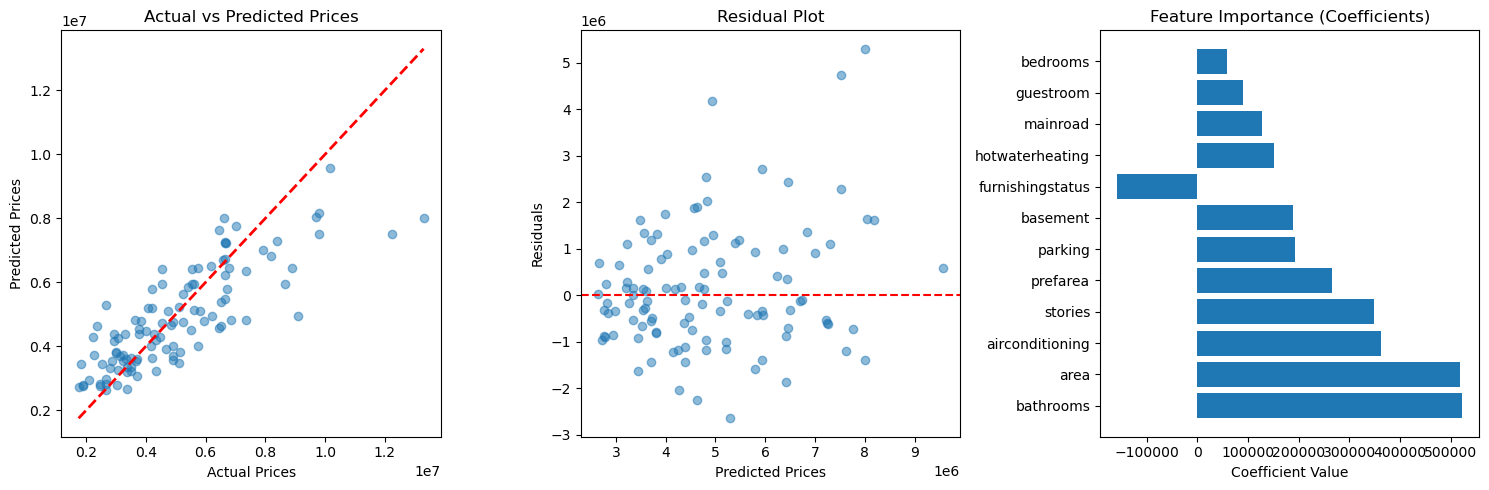


ACTUAL VS PREDICTED PRICES (First 20 samples):
       Actual   Predicted  Difference
316   4060000  5203691.71 -1143691.71
77    6650000  7257004.02  -607004.02
360   3710000  3062828.60   647171.40
90    6440000  4559591.65  1880408.35
493   2800000  3332932.31  -532932.31
209   4900000  3563080.68  1336919.32
176   5250000  5645466.31  -395466.31
249   4543000  6413979.67 -1870979.67
516   2450000  2755831.55  -305831.55
426   3353000  2668938.66   684061.34
6    10150000  9570600.30   579399.70
497   2660000  2827431.51  -167431.51
422   3360000  3195686.26   164313.74
424   3360000  3352263.99     7736.01
529   2275000  3713879.50 -1438879.50
499   2660000  5301088.24 -2641088.24
498   2660000  2987920.27  -327920.27
55    7350000  4810799.82  2539200.18
476   2940000  4383031.70 -1443031.70
486   2870000  3525092.19  -655092.19


In [8]:
# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Actual': y_test_m,
    'Predicted': y_pred_m,
    'Difference': y_test_m - y_pred_m
}).head(20)

# Plot actual vs predicted values
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test_m, y_pred_m, alpha=0.5)
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

# Plot residuals
plt.subplot(1, 3, 2)
residuals = y_test_m - y_pred_m
plt.scatter(y_pred_m, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Plot feature importance (coefficients)
plt.subplot(1, 3, 3)
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': multi_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Coefficients)')
plt.tight_layout()
plt.show()

# Display comparison table
print("\nACTUAL VS PREDICTED PRICES (First 20 samples):")
print(comparison_df.round(2))

In [9]:
print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print(f"{'Metric':<10} {'Simple Regression':<20} {'Multiple Regression':<20}")
print(f"{'MAE':<10} {mae_s:<20.2f} {mae_m:<20.2f}")
print(f"{'MSE':<10} {mse_s:<20.2f} {mse_m:<20.2f}")
print(f"{'RMSE':<10} {np.sqrt(mse_s):<20.2f} {np.sqrt(mse_m):<20.2f}")
print(f"{'R²':<10} {r2_s:<20.4f} {r2_m:<20.4f}")

# Interpretation of top coefficients
print("\n" + "="*60)
print("INTERPRETATION OF TOP FEATURES (Multiple Regression)")
print("="*60)
top_features = feature_importance.head(5)
for _, row in top_features.iterrows():
    effect = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"• {row['Feature']:15}: Coefficient = {row['Coefficient']:7.2f}")
    print(f"  → One standard deviation increase {effect} price by ${abs(row['Coefficient']):.2f}")

# Key insights
print("\n" + "="*60)
print("KEY INSIGHTS")
print("="*60)
print("1. Multiple regression performs better than simple regression")
print("2. Top features influencing house prices:")
for feature in top_features['Feature'].head(3):
    print(f"   - {feature}")
print("3. The model explains {:.1f}% of price variance".format(r2_m * 100))


MODEL COMPARISON SUMMARY
Metric     Simple Regression    Multiple Regression 
MAE        1474748.13           979679.69           
MSE        3675286604768.19     1771751116594.04    
RMSE       1917103.70           1331071.42          
R²         0.2729               0.6495              

INTERPRETATION OF TOP FEATURES (Multiple Regression)
• bathrooms      : Coefficient = 523153.38
  → One standard deviation increase increases price by $523153.38
• area           : Coefficient = 519288.13
  → One standard deviation increase increases price by $519288.13
• airconditioning: Coefficient = 362446.19
  → One standard deviation increase increases price by $362446.19
• stories        : Coefficient = 348177.11
  → One standard deviation increase increases price by $348177.11
• prefarea       : Coefficient = 266661.05
  → One standard deviation increase increases price by $266661.05

KEY INSIGHTS
1. Multiple regression performs better than simple regression
2. Top features influencing house 